<a href="https://colab.research.google.com/github/greensky0107/first_repository/blob/master/Day51_DeepLearningProjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing Price

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
404
102


In [3]:
print("Shape of train_data:", train_data.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_data:", test_data.shape)
print("Shape of test_labels:", test_labels.shape)

print("\nFirst 5 elements of train_data:")
display(train_data[:5])

print("\nFirst 5 elements of train_labels:")
display(train_labels[:5])

Shape of train_data: (404, 13)
Shape of train_labels: (404,)
Shape of test_data: (102, 13)
Shape of test_labels: (102,)

First 5 elements of train_data:


array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01]])


First 5 elements of train_labels:


array([15.2, 42.3, 50. , 21.1, 17.7])

In [4]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean=train_data.mean(axis=0)
train_data=train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data=train_data/std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data=test_data - mean
test_data = test_data / std

In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

boston = models.Sequential()
boston.add(layers.Input(shape=(train_data.shape[1],)))
boston.add(layers.Dense(64, activation='relu'))
boston.add(layers.Dense(64, activation='relu'))
boston.add(layers.Dense(64, activation='relu'))
boston.add(layers.Dense(1))
boston.summary()

boston.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,281 (36.25 KB)

 Trainable params: 9,281 (36.25 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = boston.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=512,
                    validation_data=(test_data, test_labels))

Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 593.3539 - mae: 22.5340 - val_loss: 605.0354 - val_mae: 22.8221
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - loss: 576.6873 - mae: 22.1600 - val_loss: 591.7370 - val_mae: 22.5271
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 563.8289 - mae: 21.8630 - val_loss: 579.1735 - val_mae: 22.2432
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 551.7508 - mae: 21.5792 - val_loss: 566.4355 - val_mae: 21.9507
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 539.6901 - mae: 21.2915 - val_loss: 553.3732 - val_mae: 21.6469
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 527.3229 - mae: 20.9925 - val_loss: 539.9595 - val_mae: 21.3299
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 514.5789 - mae: 20.6800 - val_loss: 526.1185 - val_mae: 20.9972
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 501.3287 - mae: 20.3499 - val_loss: 511.6116 - val_mae: 20.6429
Epoch 9/60
1/1 ━━━━━━━━━━━━━━

In [7]:
import matplotlib.pyplot as plt

def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()


    mae = history_dict['mae']
    val_mae = history_dict['val_mae']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, mae, 'b-', label='train_mae')
    ax2.plot(epochs, val_mae, 'r-', label='val_mae')
    ax2.set_title('Train and Validation MAE')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('MAE')
    ax2.grid()
    ax2.legend()

    plt.show()

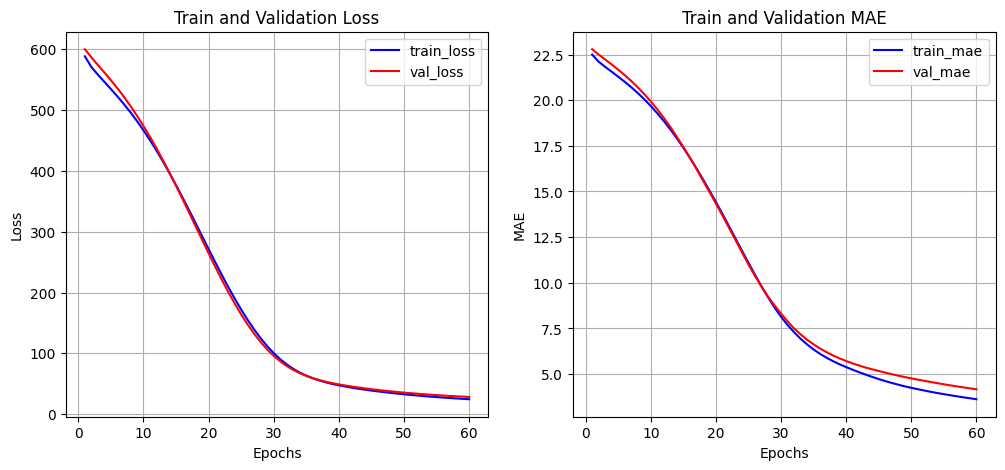

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 27.0191 - mae: 4.1315


[28.371706008911133, 4.163092136383057]

In [ ]:
show_history(history)
boston.evaluate(test_data, test_labels)

# Reuters

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [10]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [11]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [12]:
# BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성.
from tensorflow.keras import models, layers, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

reuters = models.Sequential()
reuters.add(layers.Input(shape=(10000, )))

reuters.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), name='input')) # L2 정규화 추가
reuters.add(layers.BatchNormalization())
reuters.add(layers.Activation('relu'))
reuters.add(layers.Dropout(0.4))
reuters.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), name='hidden')) # L2 정규화 추가
reuters.add(layers.BatchNormalization())
reuters.add(layers.Activation('relu'))
reuters.add(layers.Dropout(0.4))
reuters.add(layers.Dense(46, activation='softmax', name='output'))


reuters.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

reuters.summary()

check_point_cb = callbacks.ModelCheckpoint('reuters.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = reuters.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 647,726 (2.47 MB)

 Trainable params: 647,470 (2.47 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3804 - loss: 2.8769

211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3811 - loss: 2.8738 - val_accuracy: 0.7004 - val_loss: 1.7729
Epoch 2/60
207/211 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6813 - loss: 1.5200

211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6815 - loss: 1.5193 - val_accuracy: 0.7458 - val_loss: 1.3516
Epoch 3/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7447 - loss: 1.2845

211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7447 - loss: 1.2845 - val_accuracy: 0.7689 - val_loss: 1.2860
Epoch 4/60
209/211 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7772 - loss: 1.1585

211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7772 - loss: 1.1585 - val_accuracy: 0.7876 - val_loss: 1.2307
Epoch 5/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7963 - loss: 1.0549 - val_accuracy: 0.7867 - val_loss: 1.2405
Epoch 6/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8206 - loss: 0.9667 - val_accuracy: 0.7894 - val_loss: 1.2339
Epoch 7/60
210/211 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8303 - loss: 0.9449

211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8303 - loss: 0.9450 - val_accuracy: 0.8094 - val_loss: 1.2140
Epoch 8/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8414 - loss: 0.9117 - val_accuracy: 0.8010 - val_loss: 1.2357
Epoch 9/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8439 - loss: 0.8981 - val_accuracy: 0.8041 - val_loss: 1.2451
Epoch 10/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8431 - loss: 0.9085 - val_accuracy: 0.7970 - val_loss: 1.2759
Epoch 11/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8586 - loss: 0.8653 - val_accuracy: 0.8094 - val_loss: 1.2521
Epoch 12/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8646 - loss: 0.8447 - val_accuracy: 0.8103 - val_loss: 1.2328
Epoch 13/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8730 - loss: 0.7903 - val_accuracy: 0.8192 - val_loss: 1.2456
Epoch 14/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8776 - loss: 0.7897 - val_accuracy: 

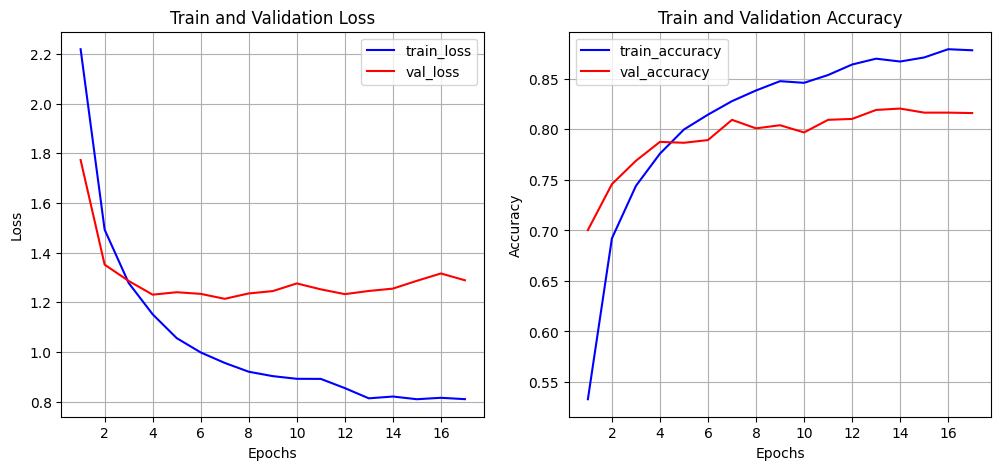

In [13]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [14]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
reuters.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8047 - loss: 1.2557


[1.277422308921814, 0.7902938723564148]

# CIFAR 10

CIFAR10 dataset은 32x32 픽셀의 6,000개 컬러 이미지로 구성.

dataset의 각 이미지는 10개의 클래스로 labeling 되어 있음.

train dataset에서 20%를 validation dataset으로 분리

train dataset은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용. (sklearn 라이브러리의 train_test_split 함수를 활용)

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [17]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

x_train_full, x_val, y_train_full, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

x_train = x_train_full
y_train = y_train_full

x_test = test_images
y_test = test_labels

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [18]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

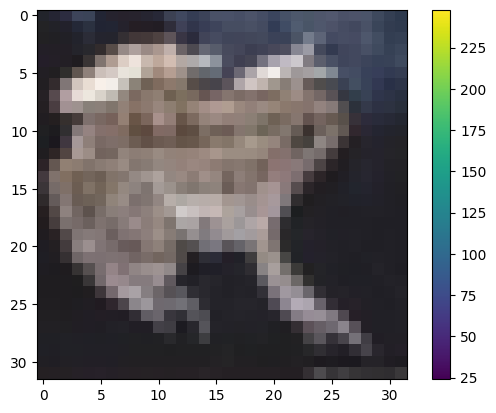

In [19]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [20]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [21]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(x_train.shape[0], 3072)
x_val = x_val.reshape(x_val.shape[0], 3072)
x_test = x_test.reshape(x_test.shape[0], 3072)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [22]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [30]:
# Model 구성 및 compile
from tensorflow.keras import models, layers, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

cifar10 = models.Sequential()
cifar10.add(layers.Input(shape=(3072, )))

cifar10.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001)))
cifar10.add(layers.BatchNormalization())
cifar10.add(layers.Activation('relu'))
cifar10.add(layers.Dropout(0.5))

cifar10.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001)))
cifar10.add(layers.BatchNormalization())
cifar10.add(layers.Activation('relu'))
cifar10.add(layers.Dropout(0.3))

cifar10.add(layers.Dense(10, activation='softmax', name='output'))

cifar10.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

cifar10.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,410 (3.14 MB)

 Trainable params: 821,642 (3.13 MB)

 Non-trainable params: 768 (3.00 KB)

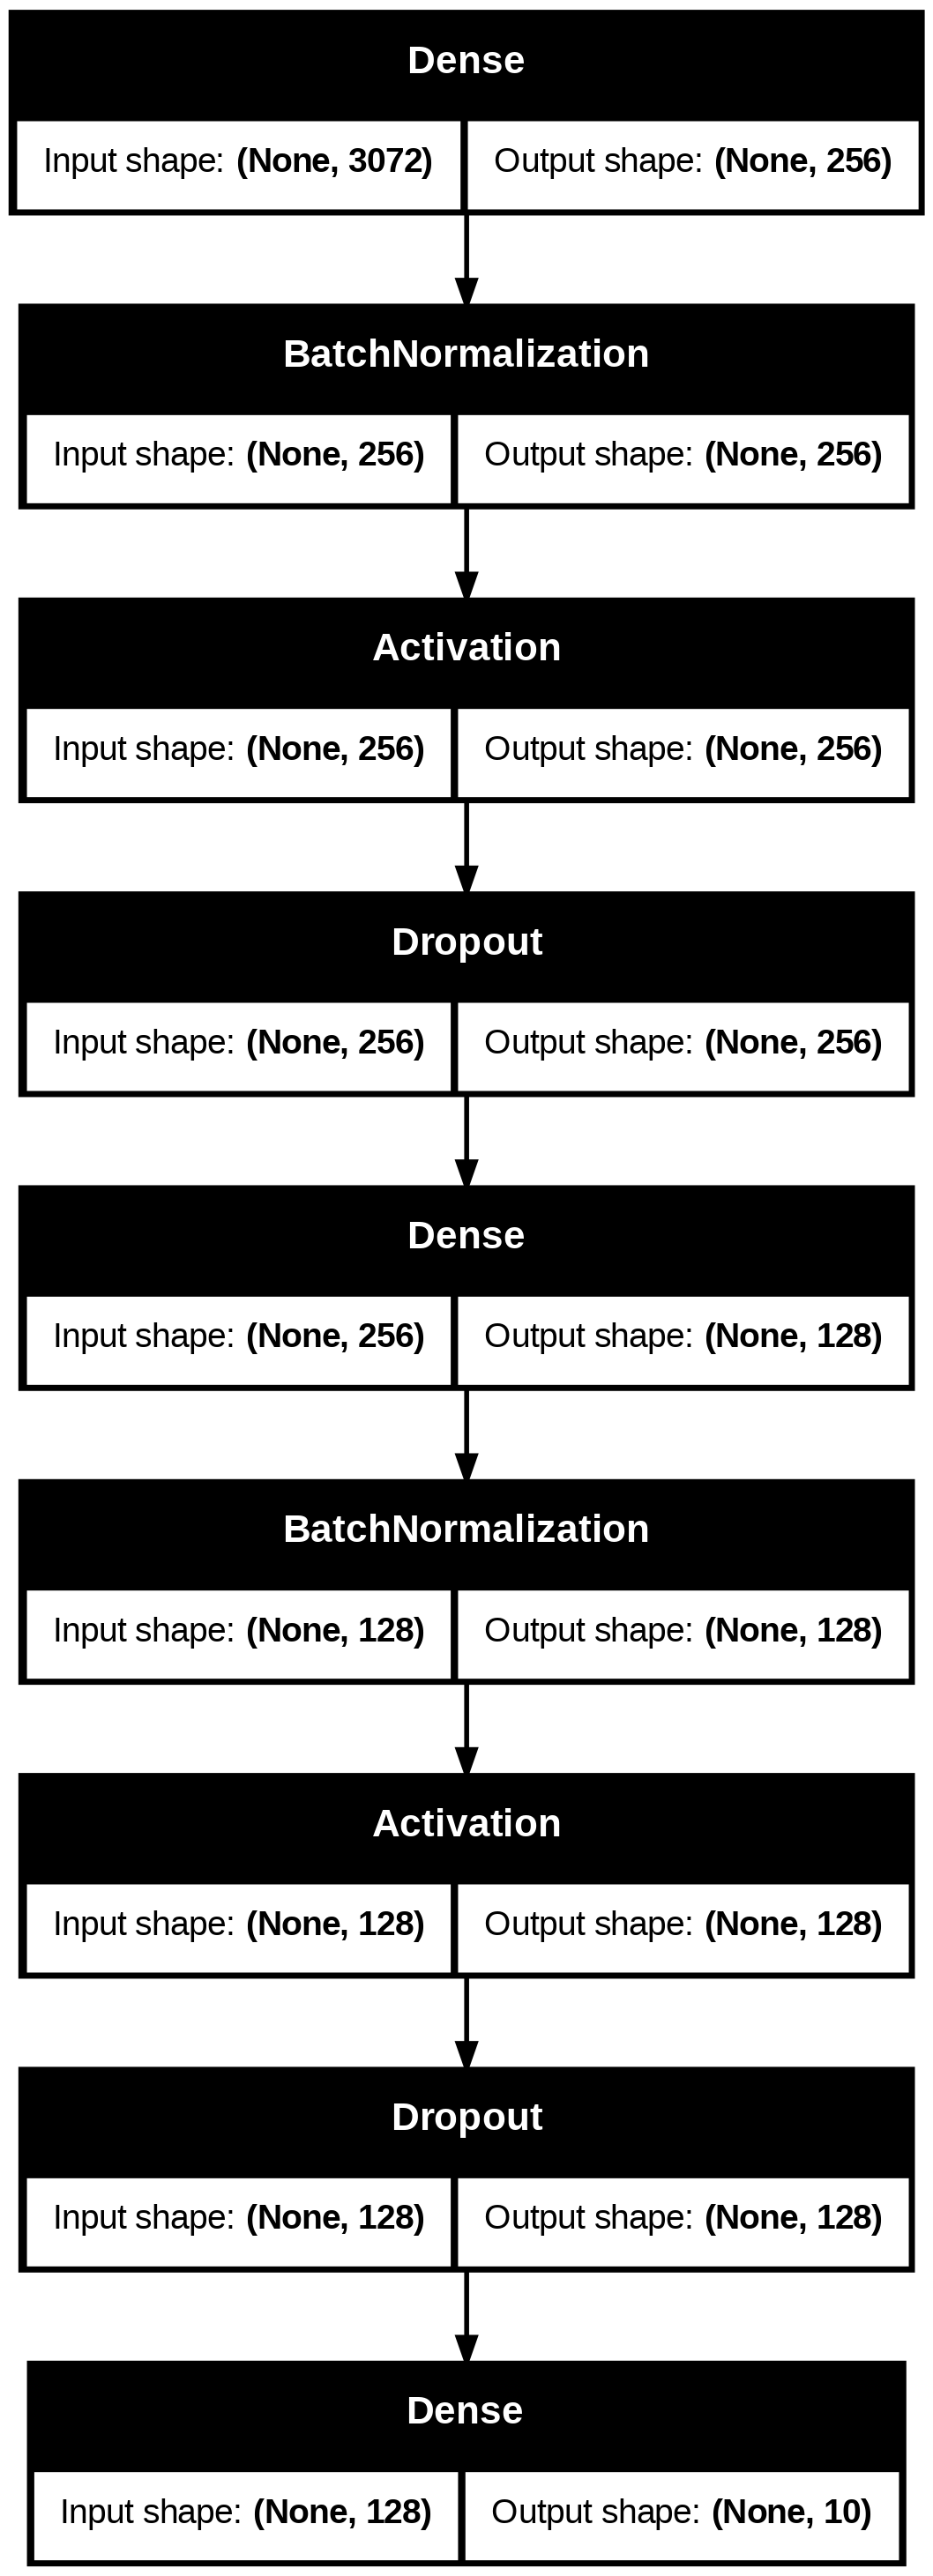

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(cifar10, show_shapes=True)

In [32]:
# Train the model
check_point_cb = callbacks.ModelCheckpoint('cifar10.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = cifar10.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2719 - loss: 2.6227

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.2720 - loss: 2.6223 - val_accuracy: 0.3152 - val_loss: 2.2002
Epoch 2/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3585 - loss: 2.0670

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3585 - loss: 2.0669 - val_accuracy: 0.3184 - val_loss: 2.1333
Epoch 3/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3662 - loss: 2.0041

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.3662 - loss: 2.0041 - val_accuracy: 0.3464 - val_loss: 2.0709
Epoch 4/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.3651 - loss: 1.9979 - val_accuracy: 0.3241 - val_loss: 2.1056
Epoch 5/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.3661 - loss: 1.9775 - val_accuracy: 0.3053 - val_loss: 2.1374
Epoch 6/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3683 - loss: 1.9815 - val_accuracy: 0.3051 - val_loss: 2.1064
Epoch 7/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3761 - loss: 1.9710 - val_accuracy: 0.3215 - val_loss: 2.1117
Epoch 8/60
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3726 - loss: 1.9741

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.3726 - loss: 1.9741 - val_accuracy: 0.3451 - val_loss: 2.0546
Epoch 9/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.3713 - loss: 1.9848 - val_accuracy: 0.3026 - val_loss: 2.1153
Epoch 10/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.3725 - loss: 1.9718 - val_accuracy: 0.3012 - val_loss: 2.1385
Epoch 11/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3758 - loss: 1.9728 - val_accuracy: 0.3094 - val_loss: 2.1417
Epoch 12/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.3788 - loss: 1.9656 - val_accuracy: 0.3083 - val_loss: 2.1231
Epoch 13/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.3796 - loss: 1.9718 - val_accuracy: 0.3256 - val_loss: 2.1581
Epoch 14/60
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3734 - loss: 1.9840

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3734 - loss: 1.9840 - val_accuracy: 0.3583 - val_loss: 2.0112
Epoch 15/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3781 - loss: 1.9696 - val_accuracy: 0.3102 - val_loss: 2.1766
Epoch 16/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.3773 - loss: 1.9773 - val_accuracy: 0.2908 - val_loss: 2.2062
Epoch 17/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3749 - loss: 1.9695 - val_accuracy: 0.2270 - val_loss: 2.5849
Epoch 18/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.3791 - loss: 1.9758 - val_accuracy: 0.3027 - val_loss: 2.1661
Epoch 19/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.3742 - loss: 1.9782 - val_accuracy: 0.2755 - val_loss: 2.2000
Epoch 20/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.3741 - loss: 1.9753 - val_accuracy: 0.2957 - val_loss: 2.2405
Epoch 21/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3721 - los

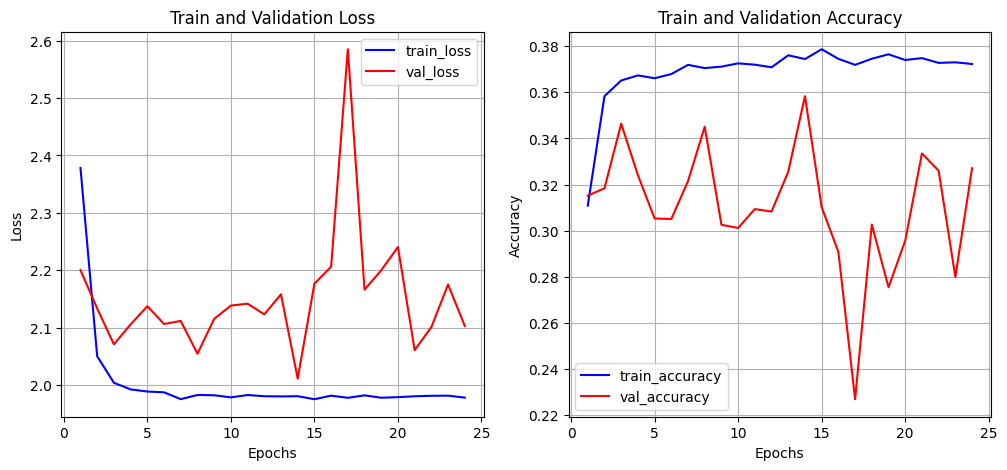

In [34]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [36]:
cifar10.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3664 - loss: 1.9990


[2.001966714859009, 0.36149999499320984]